In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-11-27 16:40:09.683108: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 16:40:09.737773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 16:40:09.737818: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 16:40:09.737861: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already b

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df_ph = pd.read_csv('Dataset/Ph.csv')
# df_kelembapan = pd.read_csv('Dataset/kelembapan.csv')
# df_hujan = pd.read_csv('/content/drive/MyDrive/Dataset/curah hujan baru.csv')
data = pd.read_csv('Dataset/panen.csv')
# df_temp = pd.read_csv('Dataset/suhu tanah.csv')
# df_jarak = pd.read_csv('Dataset/jarak tanaman.csv')

In [5]:
# columns_to_drop = ['Luas Lahan']
# data = data.drop(columns_to_drop, axis=1)

In [9]:
## Data Curah Hujan
# df_hujan.to_csv('udan.csv', index=False)
# df_hujan_baru = pd.read_csv('udan.csv')
# df_hujan_baru.info()

## Data Yield
# data.to_csv('panen.csv', index=False)
# data = pd.read_csv('oke.csv')
# data['Produksi Padi (ton)'] = pd.to_numeric(data['Produksi Padi (ton)'],errors='coerce')
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# df_panen_baru.info()

In [10]:
data.shape
#X= 59 -> input
#y= 6 -> fitur/parameter

(60, 5)

In [11]:
data

,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,Januari,38111,15.00,90.30,343.70
1,Februari,38111,1948.00,11767.87,201.10
2,Maret,38111,24877.00,151724.82,262.80
3,April,38111,5218.00,32095.92,197.20
4,Mei,38111,671.00,3983.73,206.70
5,Juni,38111,2591.00,59735.42,128.00
6,Juli,38111,2874.00,63961.14,91.70
7,Agustus,38111,974.00,17902.15,35.00
8,September,38111,671.00,16069.38,0.00
9,Oktober,38111,1581.00,9797.46,15.06


In [12]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# def _plot_series(series, series_name, series_index=0):
#   from matplotlib import pyplot as plt
#   import seaborn as sns
#   palette = list(sns.palettes.mpl_palette('Dark2'))
#   xs = series['Tahun']
#   ys = series['Produksi Padi (ton/gkg)']

#   plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = data.sort_values('Tahun', ascending=True)
# _plot_series(df_sorted, '')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('Tahun')
# _ = plt.ylabel('Produksi Padi')

In [13]:
# plt.plot(data['Tahun'], data['Produksi Padi (ton/gkg)'])
# # plt.plot(df['Date'], df['Python'])

In [14]:
## Parameter/Fitur
X = data[['curah hujan', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton)']

## Ganti Bulan Ke angka

In [15]:
# from sklearn.linear_model import Ridge
# from sklearn.utils import class_weight

# # Misalnya, menggunakan Ridge Regression dengan penalti L2
# # Menghitung bobot kelas secara dinamis
# weights = class_weight.compute_sample_weight('balanced', X)

# # Inisialisasi model
# model = Ridge(alpha=1.0, random_state=42)
# model.fit(X, y, sample_weight=weights)

In [16]:
month_mapping = {
    'Januari': 1,
    'Februari': 2,
    'Maret': 3,
    'April': 4,
    'Mei': 5,
    'Juni': 6,
    'Juli': 7,
    'Agustus': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Desember': 12
}

In [17]:
data['Bulan'] = data['Bulan'].map(month_mapping)

In [18]:
# columns_to_drop = ['Bulan']
# data = data.drop(columns_to_drop, axis=1)

In [19]:
# data['Tanggal'] = pd.to_datetime(data[['Tahun', 'Bulan']].assign(Day=1))
# columns_to_drop = ['Tahun']
# data = data.drop(columns_to_drop, axis=1)
data

,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,1,38111,15.00,90.30,343.70
1,2,38111,1948.00,11767.87,201.10
2,3,38111,24877.00,151724.82,262.80
3,4,38111,5218.00,32095.92,197.20
4,5,38111,671.00,3983.73,206.70
5,6,38111,2591.00,59735.42,128.00
6,7,38111,2874.00,63961.14,91.70
7,8,38111,974.00,17902.15,35.00
8,9,38111,671.00,16069.38,0.00
9,10,38111,1581.00,9797.46,15.06


# Onehot encoding (gksido)

In [20]:
# from sklearn.preprocessing import OneHotEncoder
# df_onehot = pd.get_dummies(data, columns=['Bulan'], prefix=['Bulan'])
# data = df_onehot.loc[:, df_onehot.columns != 'Produksi Padi (ton/gkg)']
# data['Produksi Padi (ton/gkg)'] = df_onehot['Produksi Padi (ton/gkg)']

In [21]:
data.shape

(60, 5)

In [22]:
data.dtypes

Bulan                    int64
Luas Lahan               int64
Luas Panen (ha)        float64
Produksi Padi (ton)    float64
curah hujan            float64
dtype: object

In [23]:
data

,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton),curah hujan
0,1,38111,15.00,90.30,343.70
1,2,38111,1948.00,11767.87,201.10
2,3,38111,24877.00,151724.82,262.80
3,4,38111,5218.00,32095.92,197.20
4,5,38111,671.00,3983.73,206.70
5,6,38111,2591.00,59735.42,128.00
6,7,38111,2874.00,63961.14,91.70
7,8,38111,974.00,17902.15,35.00
8,9,38111,671.00,16069.38,0.00
9,10,38111,1581.00,9797.46,15.06


## MinMax Scaler

# Heat Map

In [24]:
# corrmat = data.corr(method='pearson')
# cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
# plt.subplots(figsize=(64,32))
# sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

# Split

In [25]:
test_split=round(len(data)*0.50)
data_training=data[:test_split]
data_testing=data[test_split:]
print(data_training.shape)
print(data_testing.shape)

(60, 5)
(20, 5)


In [26]:
# from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
data_training_scaled = scaler.fit_transform(data_training)
data_testing_scaled=scaler.transform(data_testing)
data_training_scaled, data_testing_scaled

(array([[0.        , 0.96323833, 0.        , 0.        , 0.9197217 ],
        [0.09090909, 0.96323833, 0.07774918, 0.07538619, 0.53813219],
        [0.18181818, 0.96323833, 1.        , 0.97889793, 0.70323789],
        [0.27272727, 0.96323833, 0.2092752 , 0.20661677, 0.52769601],
        [0.36363636, 0.96323833, 0.02638565, 0.02513458, 0.55311747],
        [0.45454545, 0.96323833, 0.10361194, 0.38504745, 0.34252074],
        [0.54545455, 0.96323833, 0.11499477, 0.41232717, 0.245384  ],
        [0.63636364, 0.96323833, 0.03857292, 0.1149869 , 0.09365801],
        [0.72727273, 0.96323833, 0.02638565, 0.10315519, 0.        ],
        [0.81818182, 0.96323833, 0.06298769, 0.06266593, 0.04029971],
        [0.90909091, 0.96323833, 0.03523449, 0.04140648, 0.43296762],
        [1.        , 0.96323833, 0.00329821, 0.00348734, 0.93738293],
        [0.        , 1.        , 0.01155016, 0.01225222, 1.        ],
        [0.09090909, 1.        , 0.10830665, 0.11513512, 0.65132459],
        [0.18181818,

In [27]:
data_training.shape, data_testing.shape

((60, 5), (20, 5))

In [28]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i, 3])
    return np.array(dataX),np.array(dataY)
X_train,y_train=createXY(data_training_scaled,6)
X_test,y_test=createXY(data_testing_scaled,6)

In [29]:
print("trainX Shape-- ",X_train.shape)
print("trainY Shape-- ",y_train.shape)

trainX Shape--  (54, 6, 5)
trainY Shape--  (54,)


In [30]:
print("testX Shape-- ",X_test.shape)
print("testY Shape-- ",y_test.shape)

testX Shape--  (14, 6, 5)
testY Shape--  (14,)


In [31]:
print("trainX[0]-- \n",X_train[0])
print("trainY[0]-- ",y_train[0])

trainX[0]-- 
 [[0.         0.96323833 0.         0.         0.9197217 ]
 [0.09090909 0.96323833 0.07774918 0.07538619 0.53813219]
 [0.18181818 0.96323833 1.         0.97889793 0.70323789]
 [0.27272727 0.96323833 0.2092752  0.20661677 0.52769601]
 [0.36363636 0.96323833 0.02638565 0.02513458 0.55311747]
 [0.45454545 0.96323833 0.10361194 0.38504745 0.34252074]]
trainY[0]--  0.4123271744372134


In [32]:
X_train.shape[1], X_test.shape[2], X_train.shape[0]

(6, 5, 54)

In [33]:
# from sklearn.model_selection import TimeSeriesSplit
# tss = TimeSeriesSplit(n_splits = 3)
# for train_index, test_index in tss.split(X):
#     X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [34]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

In [35]:
# X_train.shape[0]

# RNN

In [36]:
!pip install scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping


# model = Sequential()
# model.add(LSTM(4, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(8, return_sequences=False))
# model.add(Dense(16))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='relu'))
# model.compile(optimizer=AdamW(learning_rate=0.0001), loss='mean_squared_error')
# # model.compile(loss=mean_squared_error, optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
# model.fit(X_train, y_train, epochs=250, batch_size=8, validation_data=(X_test, y_test), callbacks=EarlyStopping(monitor='loss', patience=3))
# # model.fit(X_train, y_train, epochs=250, batch_size=8, validation_data=(X_test, y_test))
# model.summary()

# Vigo
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=6, validation_data=(X_test, y_test))
model.summary()

Defaulting to user installation because normal site-packages is not writeable
Epoch 1/100
9/9 [==============================] - 3s 96ms/step - loss: 0.0716 - val_loss: 0.0479
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0752 - val_loss: 0.0459
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0701 - val_loss: 0.0563
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0534 - val_loss: 0.0374
Epoch 5/100
9/9 [==============================] - 0s 13ms/step - loss: 0.0581 - val_loss: 0.0358
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0509 - val_loss: 0.0360
Epoch 7/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0498 - val_loss: 0.0328
Epoch 8/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0471 - val_loss: 0.0309
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0455 - val_loss: 0.0295
Epoch 10/100
9/9 [=========================

In [37]:
# train_loss = hist.history['loss']
# val_loss = hist.history['val_loss']

# epochs = range(1, len(train_loss) + 1)
# plt.plot(epochs, train_loss, label='Training Loss')
# plt.plot(epochs, val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [38]:
prediction = model.predict(X_test)
prediction

1/1 [==============================] - 1s 501ms/step


array([[ 0.17630161],
       [ 0.08898968],
       [ 0.0120737 ],
       [ 0.5130329 ],
       [ 0.5828933 ],
       [ 0.17772183],
       [ 0.3573623 ],
       [ 0.3971455 ],
       [ 0.2088492 ],
       [ 0.1619379 ],
       [ 0.14174734],
       [ 0.16147389],
       [ 0.1099114 ],
       [-0.01204431]], dtype=float32)

In [39]:
prediction.shape

(14, 1)

In [40]:
# scaler.inverse_transform(prediction)
prediction_copies_array = np.repeat(prediction,5, axis=-1)
prediction_copies_array

array([[ 0.17630161,  0.17630161,  0.17630161,  0.17630161,  0.17630161],
       [ 0.08898968,  0.08898968,  0.08898968,  0.08898968,  0.08898968],
       [ 0.0120737 ,  0.0120737 ,  0.0120737 ,  0.0120737 ,  0.0120737 ],
       [ 0.5130329 ,  0.5130329 ,  0.5130329 ,  0.5130329 ,  0.5130329 ],
       [ 0.5828933 ,  0.5828933 ,  0.5828933 ,  0.5828933 ,  0.5828933 ],
       [ 0.17772183,  0.17772183,  0.17772183,  0.17772183,  0.17772183],
       [ 0.3573623 ,  0.3573623 ,  0.3573623 ,  0.3573623 ,  0.3573623 ],
       [ 0.3971455 ,  0.3971455 ,  0.3971455 ,  0.3971455 ,  0.3971455 ],
       [ 0.2088492 ,  0.2088492 ,  0.2088492 ,  0.2088492 ,  0.2088492 ],
       [ 0.1619379 ,  0.1619379 ,  0.1619379 ,  0.1619379 ,  0.1619379 ],
       [ 0.14174734,  0.14174734,  0.14174734,  0.14174734,  0.14174734],
       [ 0.16147389,  0.16147389,  0.16147389,  0.16147389,  0.16147389],
       [ 0.1099114 ,  0.1099114 ,  0.1099114 ,  0.1099114 ,  0.1099114 ],
       [-0.01204431, -0.01204431, -0.0

In [41]:
pred = scaler.inverse_transform(prediction_copies_array)[:, 3]

In [42]:
prediction_copies_array.shape

(14, 5)

In [43]:
label = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), 5, axis=-1))[:, 3]
label.shape

(14,)

In [44]:
# pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),4)))[:,2]

In [45]:
# original_copies_array = np.repeat(y_test,4, axis=-1)
# original=scaler.inverse_transform(np.reshape(original_copies_array,(len(y_test),4)))[:,2]

In [46]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,label)

Pred Values--  [27400.002  13875.094   1960.5559 79560.79   90382.4    27619.998
 55446.9    61609.45   32441.732  25175.018  22047.432  25103.139
 17115.938  -1775.4039]

Original Values--  [ 22110.1   2010.9   6963.  114260.   86737.   17318.   49808.   63853.
  33696.   23817.   18106.   18508.   10568.    1864. ]


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, pred)

mae = mean_absolute_error(y_test, pred)

mape = mean_absolute_percentage_error(y_test,pred)

r2 = r2_score(y_test, pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Error (MAPE): {mape}")
print(f"r2 Score: {r2}")

Mean Squared Error (MSE): 1869801690.9997365
Mean Absolute Error (MAE): 34393.631852013736
Mean Absolute Error (MAPE): 237071.29202143667
r2 Score: -42691160858.39339


In [48]:
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# # Define the build_model function with **kwargs to accept hyperparameters
# def build_model(**kwargs):
#     optimizer = kwargs.pop('optimizer', 'adam')  # Get the optimizer, default to 'adam'
#     model = Sequential()
#     model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(LSTM(50, return_sequences=False))
#     model.add(Dropout(0.2))
#     model.add(Dense(1))
#     model.compile(loss='mse', optimizer=optimizer)
#     return model

# # Create the KerasRegressor with build_fn
# grid_model = KerasRegressor(build_fn=build_model, verbose=1)

# # Define the parameter grid for GridSearchCV
# parameters = {
#     'batch_size': [16],
#     'epochs': [10],
#     'optimizer': ['adam']
# }

# # Create GridSearchCV
# grid_search = GridSearchCV(estimator=grid_model, param_grid=parameters, cv=2)
# grid_search = grid_search.fit(X_train, y_train)

# # Access the best model directly
# my_model = grid_search.best_estimator_

# # Make predictions
# prediction = my_model.predict(X_test)
# print("Prediction\n", prediction)
# print("\nPrediction Shape:", prediction.shape)

## Plot Hasil Prediksi

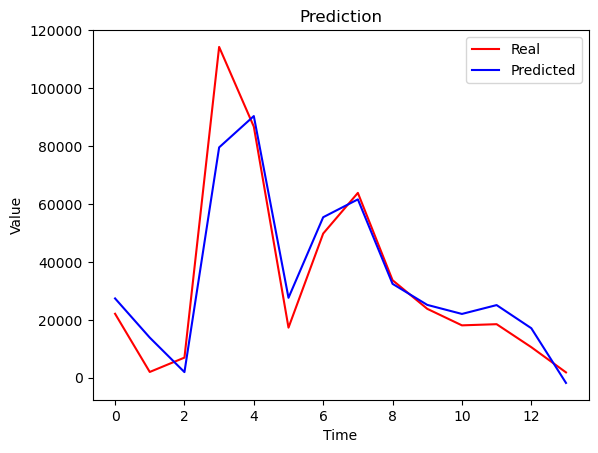

In [49]:
plt.plot(label, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'Predicted')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [47]:
data.iloc[:,1]

0     38111
1     38111
2     38111
3     38111
4     38111
5     38111
6     38111
7     38111
8     38111
9     38111
10    38111
11    38111
12    38200
13    38200
14    38200
15    38200
16    38200
17    38200
18    38200
19    38200
20    38200
21    38200
22    38200
23    38200
24    37558
25    37558
26    37558
27    37558
28    37558
29    37558
30    37558
31    37558
32    37558
33    37558
34    37558
35    37558
36    38053
37    38053
38    38053
39    38053
40    38053
41    38053
42    38053
43    38053
44    38053
45    38053
46    38053
47    38053
48    35779
49    35779
50    35779
51    35779
52    35779
53    35779
54    35779
55    35779
56    35779
57    35779
58    35779
59    35779
Name: Luas Lahan, dtype: int64

In [50]:
# # Define the data as a list of dictionaries
# new_data = [
#     {'Bulan': '1', 'Luas Lahan': 35779, 'Luas Panen (ha)': 1014.6, 'Produksi Padi (ton)': 6963, 'curah hujan': 220},
#     {'Bulan': '2', 'Luas Lahan': 35779, 'Luas Panen (ha)': 16619.6, 'Produksi Padi (ton)': 114260, 'curah hujan': 290},
#     {'Bulan': '3', 'Luas Lahan': 35779, 'Luas Panen (ha)': 13043.1, 'Produksi Padi (ton)': 86737, 'curah hujan': 298},
#     {'Bulan': '4', 'Luas Lahan': 35779, 'Luas Panen (ha)': 2602.3, 'Produksi Padi (ton)': 17318, 'curah hujan': 223},
#     {'Bulan': '5', 'Luas Lahan': 35779, 'Luas Panen (ha)': 7856.2, 'Produksi Padi (ton)': 49808, 'curah hujan': 199},
#     {'Bulan': '6', 'Luas Lahan': 35779, 'Luas Panen (ha)': 10200.2, 'Produksi Padi (ton)': 63853, 'curah hujan': 169},
#     {'Bulan': '7', 'Luas Lahan': 35779, 'Luas Panen (ha)': 5387.1, 'Produksi Padi (ton)': 33696, 'curah hujan': 178},
#     {'Bulan': '8', 'Luas Lahan': 35779, 'Luas Panen (ha)': 3822.9, 'Produksi Padi (ton)': 23817, 'curah hujan': 261},
#     {'Bulan': '9', 'Luas Lahan': 35779, 'Luas Panen (ha)': 2807.1, 'Produksi Padi (ton)': 18106, 'curah hujan': 0},
#     {'Bulan': '10', 'Luas Lahan': 35779, 'Luas Panen (ha)': 2776.9, 'Produksi Padi (ton)': 18508, 'curah hujan': 0},
#     {'Bulan': '11', 'Luas Lahan': 35779, 'Luas Panen (ha)': 1558.7, 'Produksi Padi (ton)': 10568, 'curah hujan': 370},
#     {'Bulan': '12', 'Luas Lahan': 35779, 'Luas Panen (ha)': 274.9, 'Produksi Padi (ton)': 1864, 'curah hujan': 178}
# ]


# # Create a DataFrame from the list of dictionaries
# new_data = pd.DataFrame(data)

# # Konversi data kategoris
# new_data = pd.get_dummies(new_data, columns=['Bulan'])

# # Gunakan model untuk memprediksi produksi padi
# predicted_production = model.predict(new_data)

# # Tampilkan hasil prediksi
# print(f'Prediksi Produksi Padi: {predicted_production[0]}')

In [51]:
svm_model = SVR(kernel='linear')

In [52]:
svm_model.fit(pred)

TypeError: BaseLibSVM.fit() missing 1 required positional argument: 'y'